### Mouselinos Spyridon
#### Homework 5
#### February 2020
***

#### Imports

In [1]:
import scipy.io as sio
import numpy as np
from numpy.linalg import pinv
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import linear_model

# Data Loading
File = sio.loadmat('HW5.mat')
# Train Data
Train_Data = File['Data']
# Test Data
Test_Data  = File['Data_test']

In [2]:
theta_array = Train_Data[:,0]
R_array = Train_Data[:,1]
train_dataset_length = theta_array.shape[0]

#### Given the case of a joint distribution between $\theta$ and $R$ RV's,
#### we can easily prove that p($R|\theta$):
* Is a Normal Distribution
    $N(m_{R|\theta},s_{R|\theta})$
* $m_{R|\theta} = E[R|\theta] =m_R + a\frac{s_R}{s_\theta}(x-m_\theta)$
* $a = \frac{s_{R\theta}}{s_\theta s_R}$

In [3]:
### Now let's compute the mean vector from the Training Data

In [4]:
m_theta = theta_array.mean()
m_R = R_array.mean()

m = np.array([[m_theta],[m_R]])

In [5]:
m

array([[20.00158101],
       [26.99674366]])

In [6]:
### Now let's compute the Covariance Matrix

In [7]:
cov = np.empty((2,2))
for theta, R in zip(theta_array,R_array):
    z = np.array([[theta],[R]])
    d = m - z
    dT = d.T
    temp = np.dot(d,dT)
    cov += temp
cov /= train_dataset_length

In [8]:
cov

array([[300.96610717, 105.36274376],
       [105.36274376,  36.88748843]])

In [9]:
### Now let's find all the required coefficients

In [10]:
m_theta=m[0][0]
print('m_theta : {}'.format(m_theta))
m_R=m[1][0]
print('m_R : {}'.format(m_R))
s_theta=np.sqrt(cov[0][0])
print('s_theta : {}'.format(s_theta))
s_R=np.sqrt(cov[1][1])
print('s_R : {}'.format(s_R))
s_thetaR=cov[0][1]
print('s_thetaR : {}'.format(s_thetaR))
a = s_thetaR / (s_theta*s_R)
print('a : {}'.format(a))

m_theta : 20.001581009325925
m_R : 26.9967436563167
s_theta : 17.348374770233978
s_R : 6.073507095130901
s_thetaR : 105.36274375674425
a : 0.9999740569745147


In [11]:
def Estimator(x):
    """
        This is the materialization of the relation
        
        R = f(θ) 
        R = 26.99674 + 0.99997 * (6.07350 / 17.34837) * (x - 20.00158)
        R = 26.99674 + 0.3500(x - 20.00158)
        R = 0.35 * x  + 19.99
        
    """
    return m_R + a*(s_R / s_theta)*(x - m_theta)

In [12]:
### Let's plot a fit and MSE on Train Data

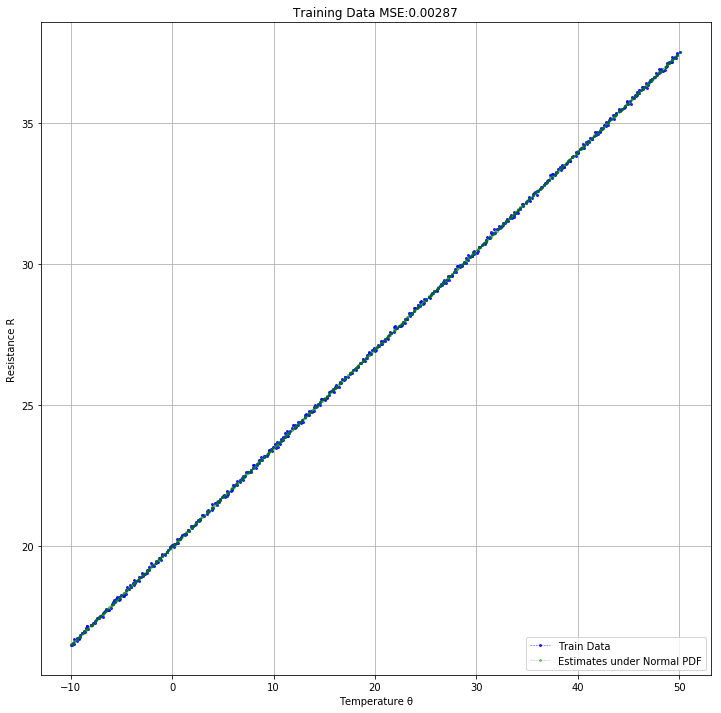

In [13]:
### Let's calculate and plot the estimates
y_est = np.empty(train_dataset_length)
for idx, x in enumerate(theta_array):
    y_est[idx] = Estimator(x)

    
### Let's find the MSE
mse_train = (R_array - y_est)**2 
mse_train = mse_train.sum() / R_array.shape[0]


### Let's plot the data
plt.figure(figsize=(12,12))
plt.title("Training Data MSE:{}".format(round(mse_train,5)))
plt.plot(theta_array, R_array, marker='o', color='blue', alpha=0.8, linestyle='dashed',
         linewidth=0.5, markersize=2, label='Train Data')
plt.plot(theta_array, y_est, marker='o',color='green', alpha=0.4,linestyle='dashed',
         linewidth=0.5, markersize=2, label='Estimates under Normal PDF')
plt.xlabel('Temperature θ')
plt.ylabel('Resistance R')
plt.grid()
plt.legend(loc=4)
plt.show()
plt.close()

In [14]:
### Now let's perform the same steps in the Test Set
### For each Row in the Set we will create a prediction and calculate the Squared Error

In [15]:
theta_array = Test_Data[:,0]
R_array = Test_Data[:,1]
test_dataset_length = theta_array.shape[0]

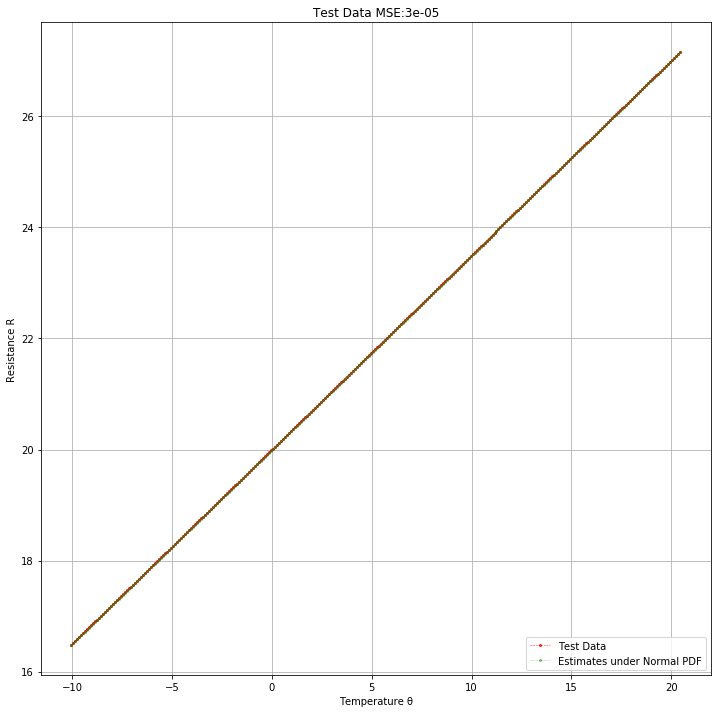

In [18]:
### Let's calculate and plot the estimates
y_est = np.empty(test_dataset_length)
for idx, x in enumerate(theta_array):
    y_est[idx] = Estimator(x)

    
### Let's find the MSE
mse_test = (R_array - y_est)**2 
mse_test = mse_test.sum() / R_array.shape[0]


### Let's plot the data
plt.figure(figsize=(12,12))
plt.title("Test Data MSE:{}".format(round(mse_test,5)))
plt.plot(theta_array, R_array, marker='o', color='red', alpha=0.8, linestyle='dashed',
         linewidth=0.5, markersize=2, label='Test Data')
plt.plot(theta_array, y_est, marker='o', color='green', alpha=0.4,linestyle='dashed',
         linewidth=0.5, markersize=2, label='Estimates under Normal PDF')
plt.xlabel('Temperature θ')
plt.ylabel('Resistance R')
plt.grid()
plt.legend(loc=4)
plt.show()
plt.close()